In [1]:
import tensorflow as tf

In [2]:
import os

In [11]:
pip list

Package                 Version
----------------------- -----------
absl-py                 2.1.0
asttokens               2.4.1
astunparse              1.6.3
certifi                 2024.6.2
charset-normalizer      3.3.2
colorama                0.4.6
comm                    0.2.2
debugpy                 1.8.1
decorator               5.1.1
executing               2.0.1
flatbuffers             24.3.25
gast                    0.5.4
google-pasta            0.2.0
grpcio                  1.64.1
h5py                    3.11.0
idna                    3.7
ipykernel               6.29.4
ipython                 8.25.0
jedi                    0.19.1
jupyter_client          8.6.2
jupyter_core            5.7.2
keras                   3.3.3
libclang                18.1.1
Markdown                3.6
markdown-it-py          3.0.0
MarkupSafe              2.1.5
matplotlib-inline       0.1.7
mdurl                   0.1.2
ml-dtypes               0.3.2
namex                   0.0.8
nest-asyncio            1

In [3]:
import cv2

In [5]:
!pip install Pillow


  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)


In [7]:
data_dir = 'data'

In [8]:
os.listdir(os.path.join(data_dir,'anime-pics'))

['1002225-u3.jpeg',
 '104883941.jpg',
 '1688105171209_desktopwallpaperkakashihatakeforandroid900x144.jpg',
 '1708066916901_ntgfvc89ff.jpg',
 '17b8e-16635957088029-1920.jpg',
 '1b1cac1b28debc63abe7c3c34aa11797.jpeg',
 '2-kakashi-hatake.jpg',
 '25-most-popular-characters-in-anime-history-according-to-mya.jpg',
 '28anime1.jpg',
 '360_F_622221708_Gg16ZdaNSixeaIORq9MuuT4w9VWTkYw4.jpg',
 '3626c-16921875120044-1920.jpg',
 '4019145-anime-dek-image.jpg',
 '600DemonSlayer2.jpg',
 '61OWJpBA4kL-_AC_UF1000-1000_QL80_.jpg',
 '71WbcekHTbL-_AC_UF1000-1000_QL80_.jpg',
 '975256fd074062129d76fda772789fa0.jpg',
 'AAAAQdNp46L46cQqYPmWzy7aRzWLvJ8M3QLzEkEkSNOCTnRNTjnWAIarepw2.jpg',
 'anime-7959691_960_720.jpg',
 'anime-boy-dark-oltg2lztxcu00bec.jpg',
 'Anime-Day-1200x834.jpg',
 'anime-series-for-summers-1686311761.jpg',
 'anime-stylecelebrating-valentines-day_23-2151258005.jpg',
 'anime-survey2-1170x780.jpg',
 'anime-terms.jpg',
 'Anime.jpg',
 'animenetflix-TA.jpg',
 'Anime_BestFightingAnime_DragonBallZGoku_

In [9]:
img_exts = ['jpeg','jpg','bmp','png']

In [15]:
for img_cls in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,img_cls)):
        img_path = os.path.join(data_dir,img_cls,img)
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in img_exts:
                os.remove(img_path)
        except exp as e:
            os.remove(img_path)
        

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 393 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

In [27]:
len(batch)

2

In [28]:
batch[1]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [29]:
from matplotlib import pyplot as plt

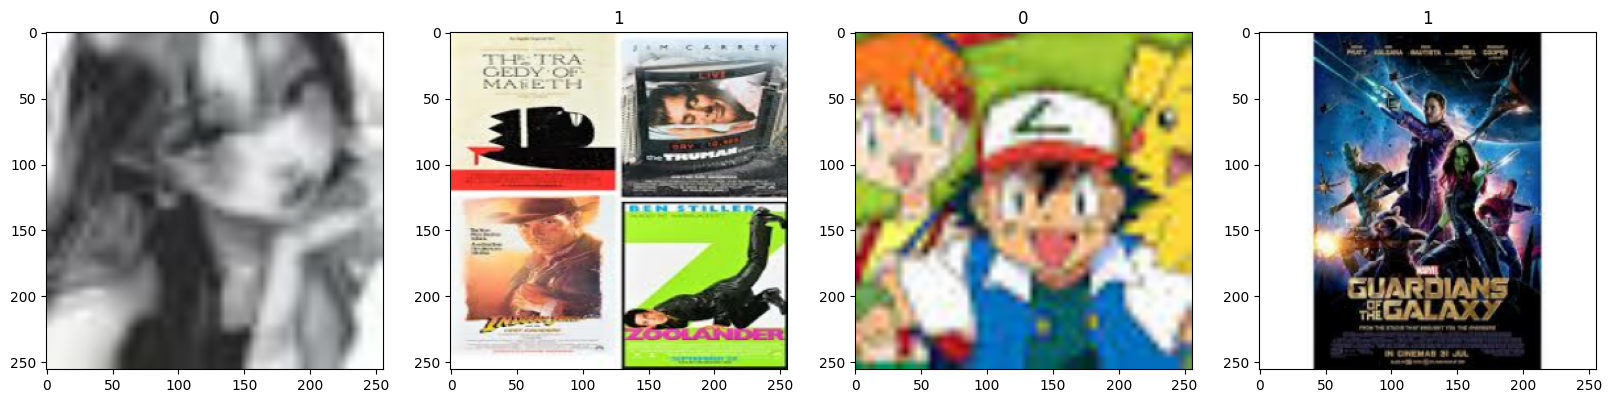

In [30]:
fig,ax = plt.subplots(ncols = 4,figsize = (20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [31]:
# class 0 - anime class 1 - movie

#--Preprocessing the Data

In [33]:
data = data.map(lambda x,y : (x/255,y))

In [34]:
scaled_iterator = data.as_numpy_iterator()

In [41]:
scaled_iterator.next()[0].max()

1.0

Split Data

In [42]:
len(data)

13

In [45]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [46]:
train_size+val_size+test_size

13

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [52]:
# len(train)  9 batches of train data imgs

In [53]:
len(train) 

9

In [54]:
len(val)

3

In [55]:
len(test)

1

DEEP MODEL

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [57]:
model = Sequential()

In [58]:
# adding a convenutional layer and maxpooling layer
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\megal\deep_learning_begin\img_clsfy\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [63]:
logdir = 'logs'


In [64]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [66]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks=[tensorboard_callback])

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 897ms/step - accuracy: 0.6520 - loss: 0.9348 - val_accuracy: 0.7188 - val_loss: 0.6666
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 861ms/step - accuracy: 0.7681 - loss: 0.5738 - val_accuracy: 0.6667 - val_loss: 0.5681
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 888ms/step - accuracy: 0.7578 - loss: 0.5461 - val_accuracy: 0.6667 - val_loss: 0.5489
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 925ms/step - accuracy: 0.7687 - loss: 0.4484 - val_accuracy: 0.8021 - val_loss: 0.4244
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 772ms/step - accuracy: 0.7831 - loss: 0.4153 - val_accuracy: 0.7708 - val_loss: 0.3793
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 847ms/step - accuracy: 0.8023 - loss: 0.3279 - val_accuracy: 0.9167 - val_loss: 0.2376
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 874ms/step - accuracy: 0.9221 - loss: 0.2329 - val_accuracy: 0.9271 - val_loss: 0.2020
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 975ms/step - accuracy: 0.9130 - loss: 0.2065 - val_accuracy: 0.9896 - val_loss

Plot performance

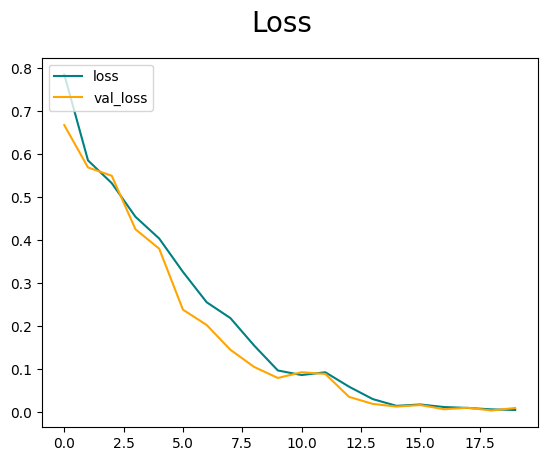

In [67]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color = 'orange',label = 'val_loss')
plt.suptitle('Loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

Evaluate Performance

In [68]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [69]:
len(test)

1

In [70]:
pre = Precision()
re = Recall()
ba = BinaryAccuracy()

In [71]:
for batch in test.as_numpy_iterator():
    X,y = batch
    ypred = model.predict(X)
    pre.update_state(y,ypred)
    re.update_state(y,ypred)
    ba.update_state(y,ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [78]:
pre.result().numpy()

1.0

TEST

In [79]:
import cv2

In [ ]:
"C:\Users\megal\Downloads\sololeveling-1670960098390.jpg"

In [123]:
img = cv2.imread("C:\\Users\\megal\\Downloads\\sololeveling-1670960098390.jpg")

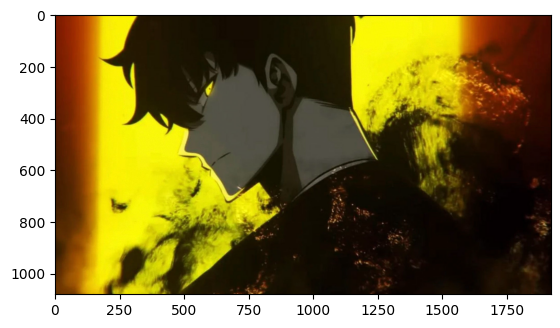

In [124]:
plt.imshow(img)

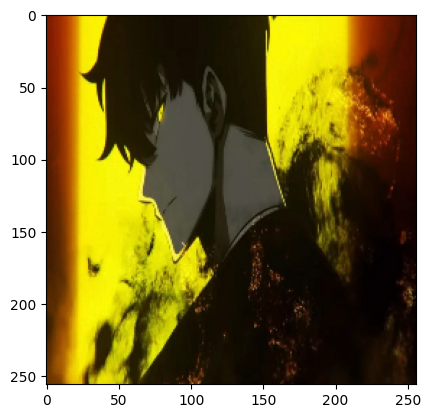

In [125]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [126]:
import numpy as np

In [132]:
op = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [133]:
op

array([[0.594603]], dtype=float32)

In [129]:
if op > 0.5:
    print('movie')
else:
    print('anime')

movie


Save The Model

In [134]:
from tensorflow.keras.models import load_model

In [135]:
model.save(os.path.join('models','anime-movie-model.h5'))

In [136]:
new_model = load_model(os.path.join('models','anime-movie-model.h5'))